### Reduce features by Variance

In [150]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.metrics import mean_squared_error, r2_score

In [151]:
mutants = pd.read_csv('../data/all_data_13.csv',index_col=0)
mutants.head(5)

,YAL003W,YAL005C,YAL007C,YAL012W,YAL035W,YAL038W,YAL042W,YAL044C,YAR002C-A,YAR007C,...,D-Fructose 6-phosphate,D-Glucose,D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate,D-Xylulose 5-phosphate;D-Ribulose 5-phosphate,Dihydroxyacetone phosphate,Glyceraldehyde 3-phosphate,Phosphoenolpyruvate,Pyruvate,Sedoheptulose 7-phosphate,alpha-D-Ribose 5-phosphate
WT,8.719377,8.960088,5.003403,8.743338,5.370779,10.313125,3.935282,6.812850,6.472343,5.387758,...,5248.663203,16459.030703,14109.667929,921.058392,1758.194055,199.991133,76.375142,2065.592332,474.343120,143.661484
YAL017W,8.653198,8.824927,5.155914,8.670526,5.374893,10.272428,2.955933,6.961889,6.299363,5.526707,...,13.066836,17002.046210,13710.190749,951.437296,11.132119,6.455504,1.349970,85.700836,79.431617,0.806534
YAR018C,8.797391,8.550221,4.993235,8.556956,5.578207,10.390911,4.389316,7.254334,6.437292,5.498802,...,19.361500,19919.397972,13448.417525,882.991924,14.230257,5.631380,1.585306,73.672407,108.635344,1.148182
YBL016W,8.543181,8.691758,4.663340,9.116122,3.596748,9.584951,4.563300,8.003110,6.923137,5.737214,...,11798.792914,17113.405359,11784.749618,654.096269,2116.528559,219.251307,103.318199,3495.661987,727.906677,206.846696
YBL088C,8.694384,8.763244,4.984653,9.056300,3.682467,9.651980,4.139872,7.229609,6.447050,5.264817,...,16.298688,14304.146218,12071.678784,604.834183,17.417181,8.438564,1.374669,92.136368,81.188838,1.095210


### Create x and y for a specific Metabolite

In [152]:
position = 731 # from 726 are metabolites

In [153]:
#get the name of the column accroding to position
print('Example') 
print(mutants.columns.get_values()[position])

Example
D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate


In [154]:
#choose metabolite (target) by position

x = mutants.iloc[:,0:725]   #stays like this
y = mutants.iloc[:,position]

### Remove features according to Variance (scikitlearn)

In [156]:
from sklearn.feature_selection import VarianceThreshold

In [172]:
def variance_threshold_selector(data_select, threshold=0.1):
    selector = VarianceThreshold(threshold)
    selector.fit(data_select)
    return data_select[data_select.columns[selector.get_support(indices=True)]]

In [177]:
data_variance = variance_threshold_selector(x, 0.05)

In [178]:
data_variance.head()

,YAL003W,YAL005C,YAL007C,YAL035W,YAL038W,YAL042W,YAL044C,YAR007C,YAR015W,YBL015W,...,YPR074C,YPR103W,YPR118W,YPR129W,YPR133C,YPR145W,YPR160W,YPR163C,YPR181C,YPR187W
WT,8.719377,8.960088,5.003403,5.370779,10.313125,3.935282,6.812850,5.387758,7.579128,4.274885,...,8.496313,5.812644,4.510428,5.711407,4.560500,6.003440,6.557329,6.617036,5.941389,4.169592
YAL017W,8.653198,8.824927,5.155914,5.374893,10.272428,2.955933,6.961889,5.526707,7.622924,4.290787,...,8.456138,5.874653,4.436561,5.700283,4.250510,6.176480,6.323853,6.557297,5.904971,4.143712
YAR018C,8.797391,8.550221,4.993235,5.578207,10.390911,4.389316,7.254334,5.498802,7.712280,4.048817,...,8.388259,5.747122,4.594382,5.884048,4.439059,6.138866,6.282303,6.254297,6.012691,4.425224
YBL016W,8.543181,8.691758,4.663340,3.596748,9.584951,4.563300,8.003110,5.737214,7.560972,4.509786,...,7.360402,6.134415,5.291918,5.873647,5.618777,6.741446,5.446941,6.169978,5.932574,6.722786
YBL088C,8.694384,8.763244,4.984653,3.682467,9.651980,4.139872,7.229609,5.264817,7.733115,3.926053,...,8.281126,5.745920,4.581871,5.644523,3.844709,6.397196,5.400316,6.551273,5.613438,4.023677


In [180]:
file_name = '../data/selection_variance.csv'
data_variance.to_csv(file_name, index=True)

In [161]:
y = y/y.max()

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data_variance, y, test_size=0.1)

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.11)

In [164]:
#fit the regular linear regressor from sklearn

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [165]:
#make predictions and compare

y_pred = regr.predict(x_train)
y_pred_val = regr.predict(x_val)

error_val = mean_squared_error(y_val, y_pred_val)
error_train = mean_squared_error(y_train, y_pred)

#print('Coefficients: \n', regr.coef_)  #show the weights
#show mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_val, y_pred_val))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, y_pred_val))

#print((1-error_val)*100)
#print((1-error_train)*100)



Mean squared error: 0.02
Variance score: -3.20


D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate


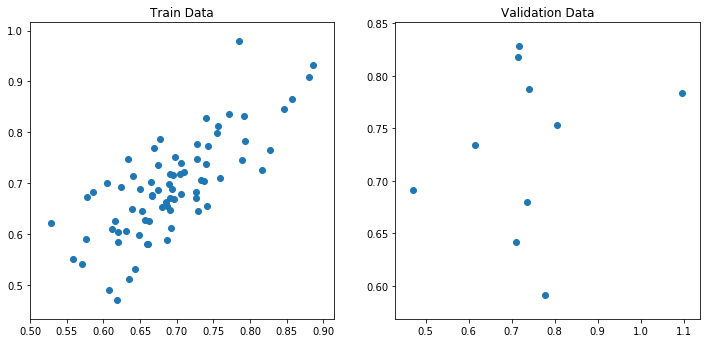

In [166]:
fig = plt.figure(figsize=(12,12))

plt.title(print(mutants.columns.get_values()[position]))
sub1 = plt.subplot(2,2,1)
sub1.set_title('Train Data')
plt.scatter(y= y_train, x=y_pred);


sub2=plt.subplot(2,2,2)
sub2.set_title('Validation Data')
plt.scatter(y= y_val, x=y_pred_val);

### Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

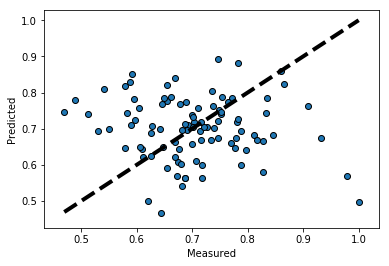

In [167]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regr, x, y, cv=30)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [168]:
from sklearn.model_selection import cross_val_score

In [169]:
scores = cross_val_score(regr, x, y, cv=20)
scores                                              


array([ -4.34731899,  -2.6912695 ,  -4.35439854,  -6.83192634,
        -1.18927721,  -2.49522   ,  -0.89740559,  -1.68403668,
        -1.01810772,   0.24091372,  -0.1408243 ,  -2.52538431,
        -1.45545326,  -1.24980692,  -2.83732093,  -2.45302308,
        -1.57926736, -25.18195423,  -0.57080546,  -5.72940153])

In [170]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: -3.45 (+/- 10.58)


<BarContainer object of 42 artists>

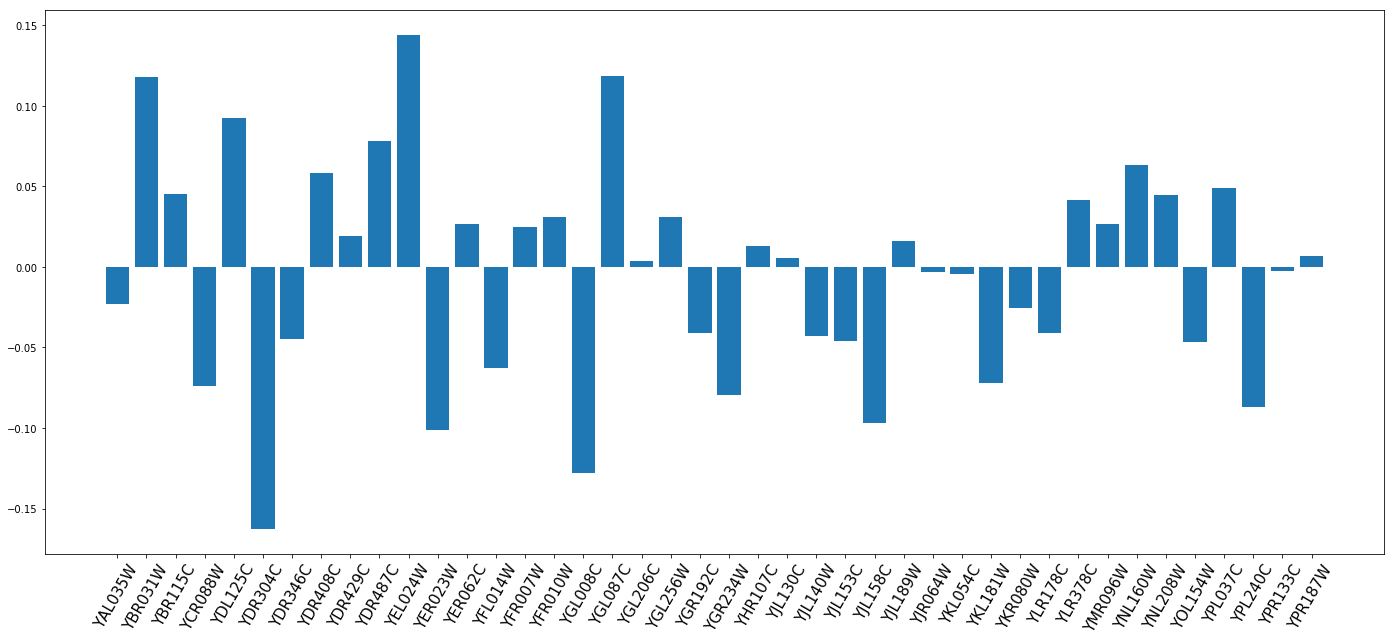

In [171]:
plt.figure(figsize=(24,10))
plt.xticks(fontsize = 15, rotation=60)
plt.bar(data_variance.columns.get_values(), regr.coef_, )